In [15]:
from pprint import pprint
import json

import pandas as pd

from constants import DATASETS

In [16]:
def load_heur_results(v, melt=True):
    heur_results = {}

    for dataset in DATASETS:
        with open(f'heur_results/heur_{dataset}.json') as f:
            heur_results[dataset] = json.load(f)

    df = pd.concat(objs=(
        pd.DataFrame.from_records(heur_results["mnist"][f"{v}"]),
        pd.DataFrame.from_records(heur_results["emnist"][f"{v}"]),
        pd.DataFrame.from_records(heur_results["svhn_cropped"][f"{v}"]),
        pd.DataFrame.from_records(heur_results["cifar10"][f"{v}"]),
    ),
        ignore_index=True
    )

    df.rename(columns={"fedavg_acc": "grid_search_acc"}, inplace=True)

    if melt:
        df = pd.melt(df, id_vars=set(df.columns).difference(["grid_search_acc", "heur_acc"]),
                     value_name="acc", var_name="res_type")

    return df

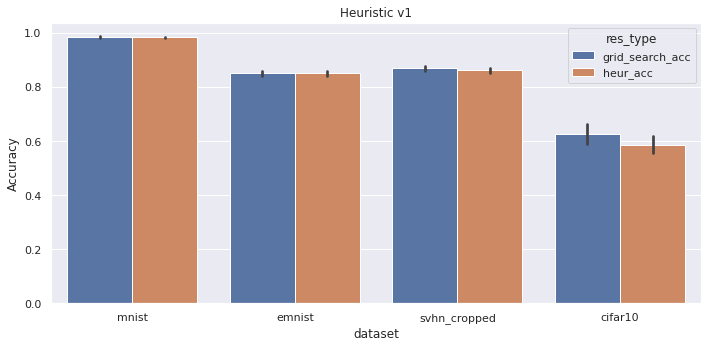

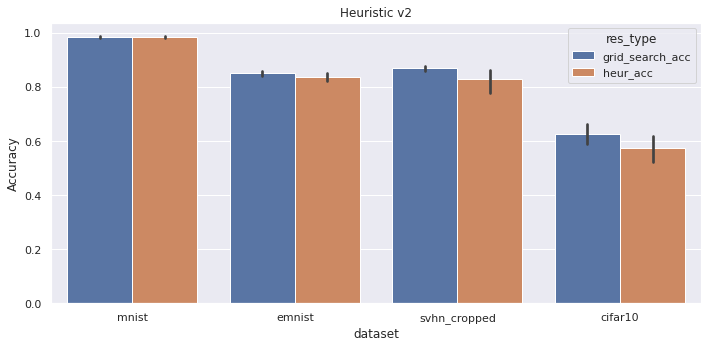

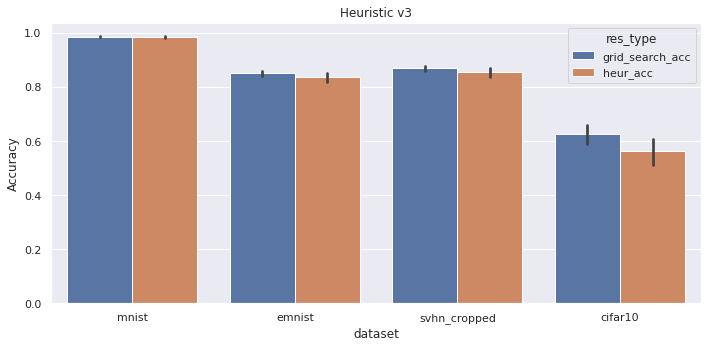

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

for v in [1, 2, 3]:
    df = load_heur_results(v)
    plt.figure(figsize=(10, 5))
    
    sns.barplot(y="acc", x="dataset", hue="res_type", hue_order= ["grid_search_acc", "heur_acc"], data=df)
    plt.title(f"Heuristic v{v}")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.savefig(fname=f"figures/heur_v{v}_res.pdf")
    plt.show()

In [18]:
import numpy as np

for v in [1, 2, 3]:
    df = load_heur_results(v, melt=False)
    print(f"v{v}")
    mean_heur = np.mean(df.heur_acc)
    std_heur = np.std(df.heur_acc)
    mean_gs = np.mean(df.grid_search_acc)
    std_gs = np.std(df.grid_search_acc)
    print(f"{mean_heur} += {std_heur}, {mean_gs} += {std_gs}, {(mean_heur - mean_gs) / mean_gs * 100}%")

v1
0.820830036294687 += 0.14981087267614124, 0.8334681958333333 += 0.13634011457360576, -1.5163337487653286%
v2
0.8065573294908736 += 0.16467550011429338, 0.8334681958333333 += 0.13634011457360576, -3.2287814312522443%
v3
0.8096167151508458 += 0.1642001215647933, 0.8334681958333333 += 0.13634011457360576, -2.861714556323283%


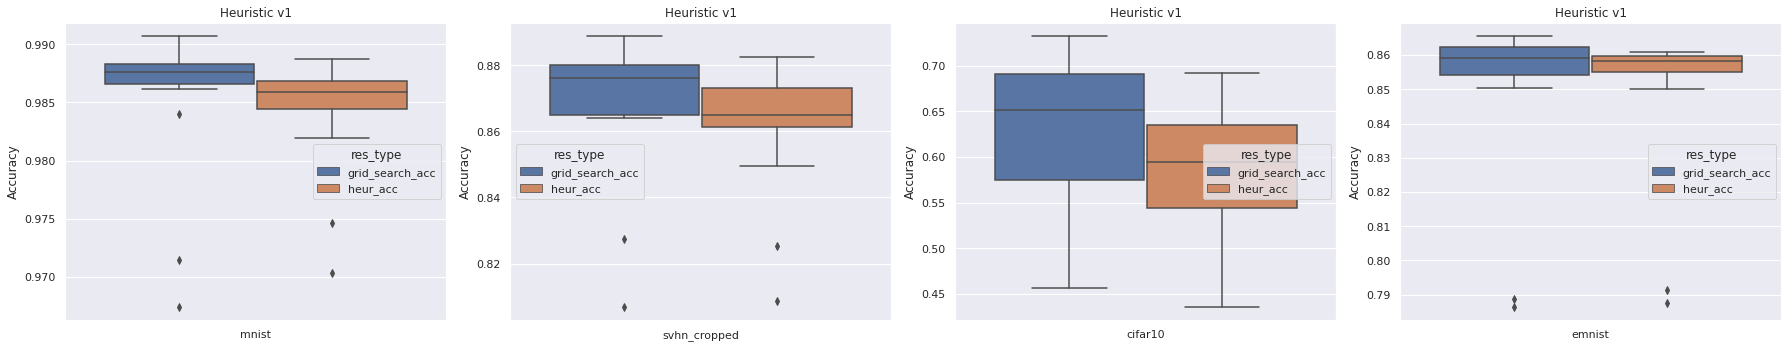

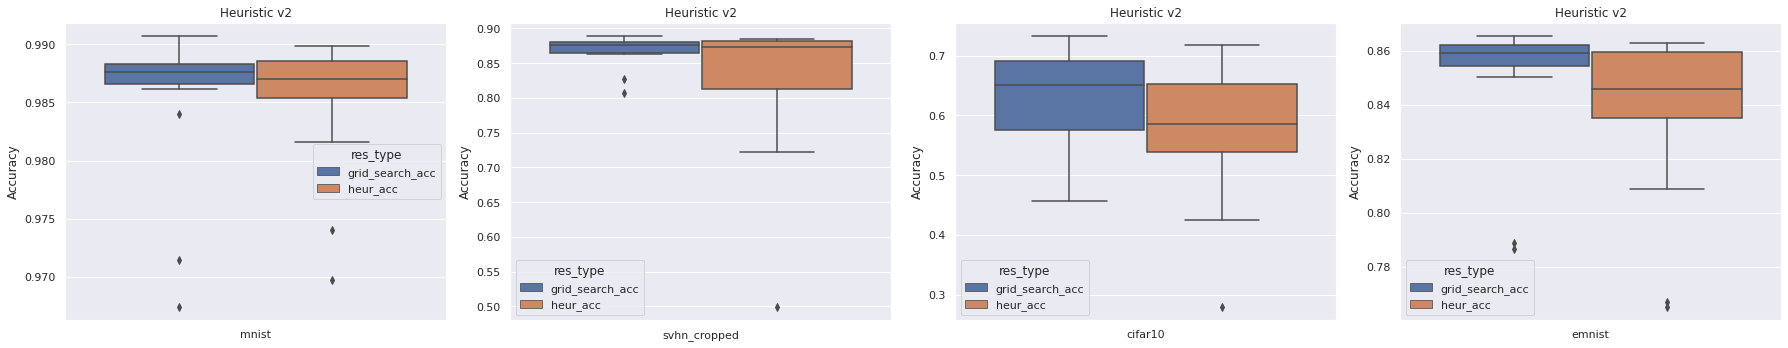

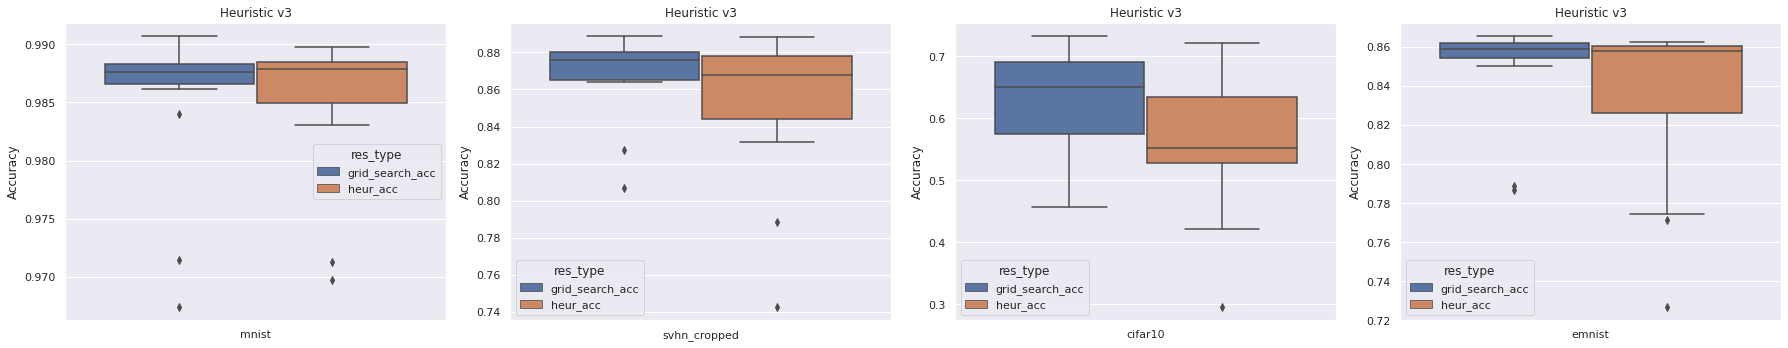

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

for v in [1, 2, 3]:
    fig, axs = plt.subplots(1, 4, figsize=(25, 5))
    df = load_heur_results(v)
    for i, d in enumerate(DATASETS):
        sns.boxplot(y="acc", x="dataset", hue="res_type", hue_order= ["grid_search_acc", "heur_acc"], data=df[df.dataset == d], ax=axs[i])
        axs[i].set_title(f"Heuristic v{v}")
        axs[i].set_ylabel("Accuracy")
        axs[i].set_xlabel("")
        plt.tight_layout()
        plt.savefig(fname=f"figures/boxplot_heur_v{v}_res.png", dpi=600)
    plt.show()

In [20]:
df = load_heur_results(v=1, melt=False)
for dataset in DATASETS:
    print(dataset)
    df_data = df[df.dataset == dataset]
    mean_heur = np.mean(df_data.heur_acc)
    mean_gs = np.mean(df_data.grid_search_acc)
    
    print("{:.2f}".format((mean_heur - mean_gs) / mean_gs * 100))

mnist
-0.12
svhn_cropped
-0.82
cifar10
-6.58
emnist
-0.12
